# WeatherPy

### Generate Random Geographic Coordinates and a List of Cities¶

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_df = "output_data/cities.csv"


### Generate the citire list by using the citipy library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tongchuan
Processing Record 2 of Set 1 | paracuru
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | great falls
Processing Record 6 of Set 1 | campechuela
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | madridejos
Processing Record 10 of Set 1 | kvissleby
Processing Record 11 of Set 1 | wagar
Processing Record 12 of Set 1 | kataragama
City not found. Skipping...
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | mejdan - obilicevo
City not found. Skipping...
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | olutanga
Processing Record 20 of

Processing Record 40 of Set 4 | yanchep
Processing Record 41 of Set 4 | 'ain el hadjar
Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | bilovods'k
Processing Record 44 of Set 4 | kailua-kona
Processing Record 45 of Set 4 | taslicay
Processing Record 46 of Set 4 | osa
Processing Record 47 of Set 4 | ji'an
Processing Record 48 of Set 4 | limon
Processing Record 49 of Set 4 | borogontsy
Processing Record 0 of Set 5 | greymouth
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | miri
Processing Record 4 of Set 5 | lucapa
Processing Record 5 of Set 5 | boa vista
Processing Record 6 of Set 5 | quellon
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | douglas
Processing Record 9 of Set 5 | taoudenni
Processing Record 10 of Set 5 | severo-yeniseyskiy
Processing Record 11 of Set 5 | wanning
Processing Record 12 of Set 5 | sorong
Processing Record 13 of Set 5 | dudinka
Processing Rec

Processing Record 31 of Set 8 | n'dalatando
Processing Record 32 of Set 8 | aquiraz
Processing Record 33 of Set 8 | richards bay
Processing Record 34 of Set 8 | maintirano
Processing Record 35 of Set 8 | al wakrah
Processing Record 36 of Set 8 | kpandae
Processing Record 37 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 38 of Set 8 | grand island
Processing Record 39 of Set 8 | trancas
Processing Record 40 of Set 8 | kavaratti
Processing Record 41 of Set 8 | juan de ayolas
Processing Record 42 of Set 8 | saipan
Processing Record 43 of Set 8 | colonia
Processing Record 44 of Set 8 | banamba
Processing Record 45 of Set 8 | asheville
Processing Record 46 of Set 8 | ngorongoro
Processing Record 47 of Set 8 | afua
Processing Record 48 of Set 8 | dalnegorsk
Processing Record 49 of Set 8 | waingapu
Processing Record 0 of Set 9 | munster
Processing Record 1 of Set 9 | piti village
Processing Record 2 of Set 9 | taro
Processing Record 3 of Set 9 | labuan lombok
City not fou

Processing Record 16 of Set 12 | uvira
Processing Record 17 of Set 12 | kimberley
Processing Record 18 of Set 12 | robore
Processing Record 19 of Set 12 | faya-largeau
Processing Record 20 of Set 12 | missoula
Processing Record 21 of Set 12 | kandi
Processing Record 22 of Set 12 | alamogordo
Processing Record 23 of Set 12 | awjilah
Processing Record 24 of Set 12 | coahuayana de hidalgo
Processing Record 25 of Set 12 | mantua
Processing Record 26 of Set 12 | laguna paiva
Processing Record 27 of Set 12 | tolanaro
Processing Record 28 of Set 12 | ingeniero guillermo n. juarez
Processing Record 29 of Set 12 | moyale
Processing Record 30 of Set 12 | nurmes
Processing Record 31 of Set 12 | duba
Processing Record 32 of Set 12 | fortuna
Processing Record 33 of Set 12 | hammerfest
Processing Record 34 of Set 12 | tidjikja
Processing Record 35 of Set 12 | campo maior
Processing Record 36 of Set 12 | bikenibeu village
Processing Record 37 of Set 12 | spearfish
Processing Record 38 of Set 12 | san

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tongchuan,35.0806,109.0897,9.52,26,0,3.95,CN,1701832175
1,paracuru,-3.4100,-39.0306,28.39,82,28,5.94,BR,1701832175
2,blackmans bay,-43.0167,147.3167,21.40,36,6,1.36,AU,1701832175
3,ilulissat,69.2167,-51.1000,-10.99,52,6,3.60,GL,1701832163
4,great falls,47.5002,-111.3008,14.67,51,20,7.72,US,1701832175


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tongchuan,35.0806,109.0897,9.52,26,0,3.95,CN,1701832175
1,paracuru,-3.4100,-39.0306,28.39,82,28,5.94,BR,1701832175
2,blackmans bay,-43.0167,147.3167,21.40,36,6,1.36,AU,1701832175
3,ilulissat,69.2167,-51.1000,-10.99,52,6,3.60,GL,1701832163
4,great falls,47.5002,-111.3008,14.67,51,20,7.72,US,1701832175


## Create the Scatter Plots Requested

#### Latitude Vs. Temperature

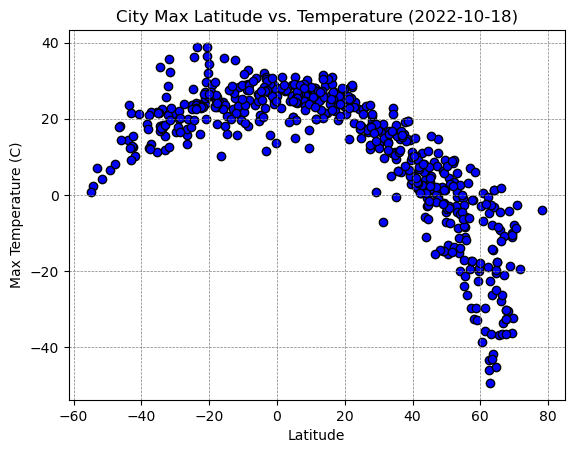

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title ("City Max Latitude vs. Temperature (2022-10-18)")

#add grid
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

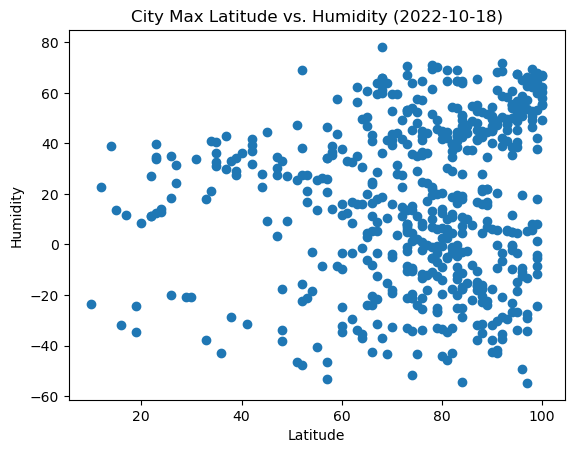

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title ("City Max Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

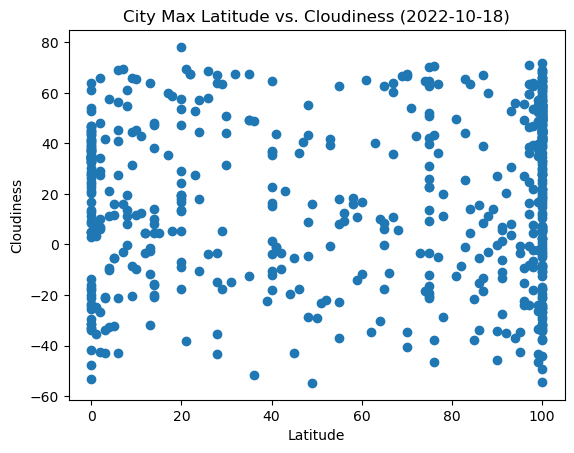

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title ("City Max Latitude vs. Cloudiness (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

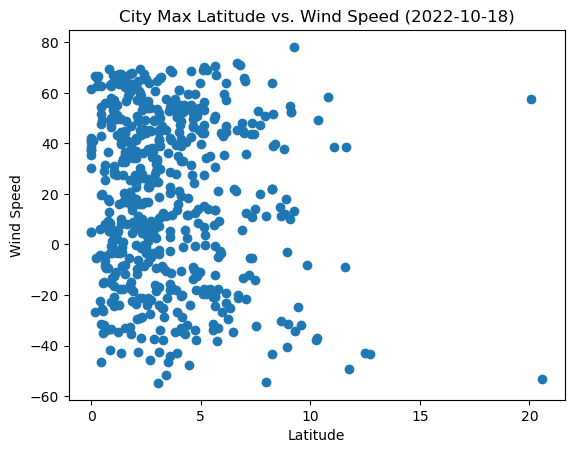

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title ("City Max Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [30]:
# Define a function to create Linear Regression plots
def plot_regression (x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    
    #print r-value
    print(f"The r-value is: {r[0]}")
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    
    #regression line values
    regression_line = x * slope + intercept
    
    #create scatter plot
    plt.scatter (x, y, marker="o", facecolors="blue", edgecolors="black", label='Data Points')
    plt.plot(x, regression_line, "r-")
    
    # Add labels and title
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    
    # Add a legend
    plt.legend()
    
    # Display correlation coefficient in the plot
    plt.annotate(f"R-squared = {r_value**2:.2f}", (min(x), max(y)), fontsize=10, color="green")
    
    # Show the plot
    plt.show()
        

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tongchuan,35.0806,109.0897,9.52,26,0,3.95,CN,1701832175
3,ilulissat,69.2167,-51.1000,-10.99,52,6,3.60,GL,1701832163
4,great falls,47.5002,-111.3008,14.67,51,20,7.72,US,1701832175
5,campechuela,20.2342,-77.2789,23.47,91,0,3.61,CU,1701832176
7,ribeira grande,38.5167,-28.7000,19.32,94,100,11.62,PT,1701832165


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,paracuru,-3.4100,-39.0306,28.39,82,28,5.94,BR,1701832175
2,blackmans bay,-43.0167,147.3167,21.40,36,6,1.36,AU,1701832175
6,grytviken,-54.2811,-36.5092,2.36,84,100,7.99,GS,1701831965
11,adamstown,-25.0660,-130.1015,22.77,83,100,6.35,PN,1701832138
12,port-aux-francais,-49.3500,70.2167,6.57,96,100,11.78,TF,1701832177


### Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8711169039443296


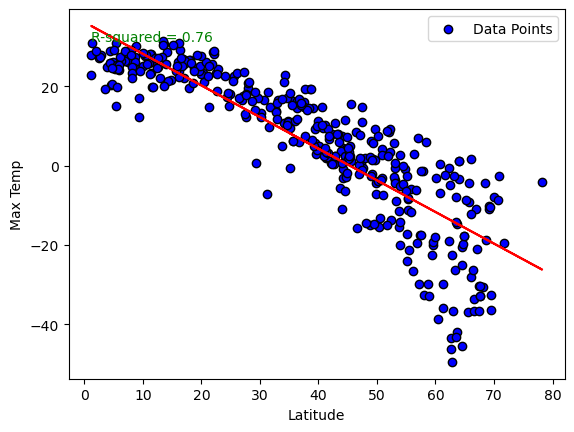

In [33]:
# Linear regression on Northern Hemisphere
plot_regression (northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"],(10, -30))

The r-value is: 0.583910442541003


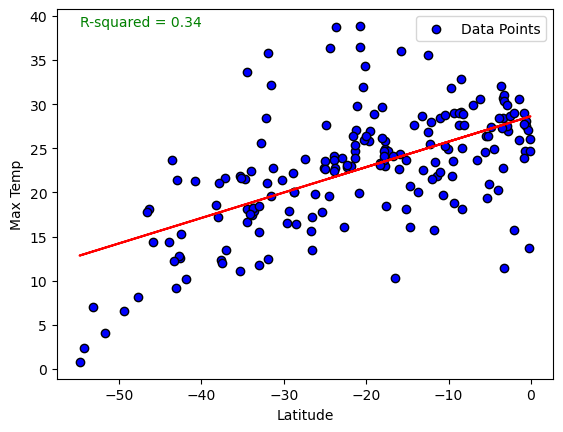

In [34]:
# Linear regression on Southern Hemisphere
plot_regression (southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

#### Discussion about the linear relationship: 
- We can observe that both the northern and southern hemisphere land eitehr sides of the spectrum. With an r-value of -0.8711169039443296, the northern hemisphere suggests a linear correlation between the variables. This tells us that as you move towards higher latitudes you are likely to experience lower max temperatures. When looking at the southern hemisphere its r-value calculates to 0.583910442541003. With this we can conclude that there is a positve relationship between the two variables as latitude increases max temp increases with it. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32799906269918805


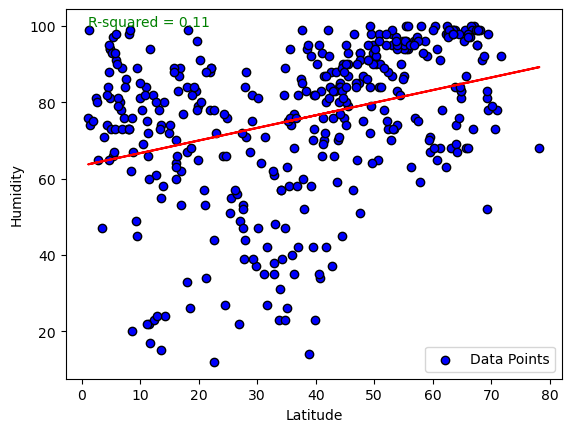

In [37]:
# Northern Hemisphere
plot_regression (northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"],(30, 20))

The r-value is: 0.17412259868190313


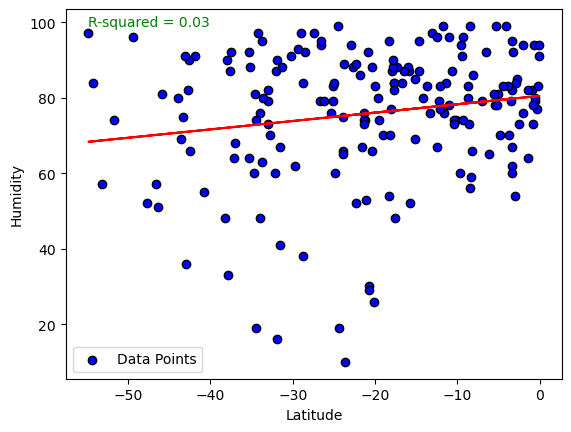

In [36]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
plot_regression (southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-30, 40))

#### Discussion about the Humidity and Latitude relationship: 
- Both the northern and southern hemisphere provide a weak relationship between humidity and latitude. This means that the tendency for one variable will increase as the other increases 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1615815946657136


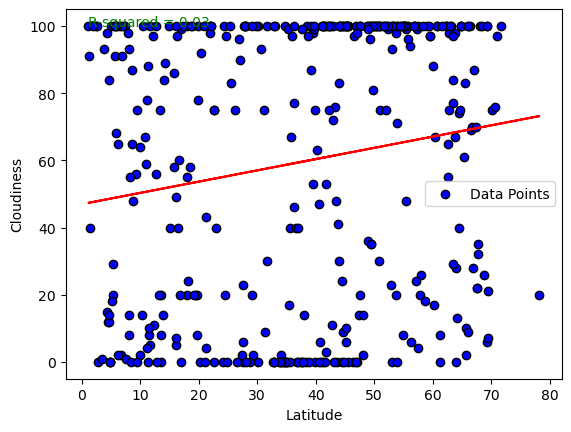

In [38]:
# Northern Hemisphere
plot_regression (northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"],(56, 30))

The r-value is: 0.051368128374763955


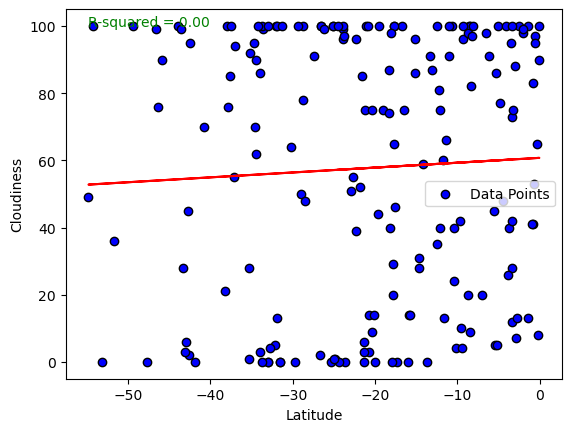

In [43]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
plot_regression (southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-40, 50))

#### Relationship between Cloudiness and Latitude: 
- Both the northern and southern hemisphere show a weak correlation between humidity and latitude. The southern hemisphere shows that there is almost 0 to no relationship between the variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0435971651557356


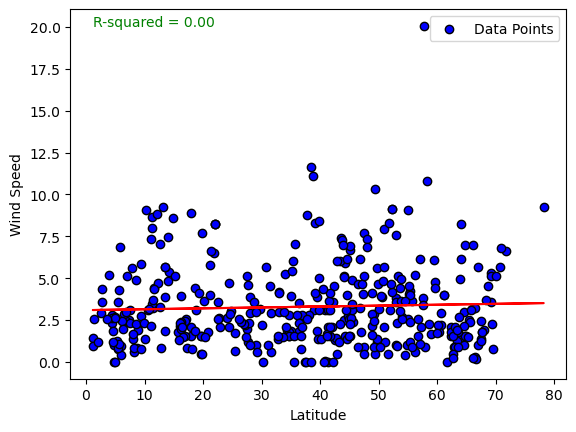

In [47]:
# Northern Hemisphere
plot_regression (northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"],(50, 32))

The r-value is: -0.27976084951763114


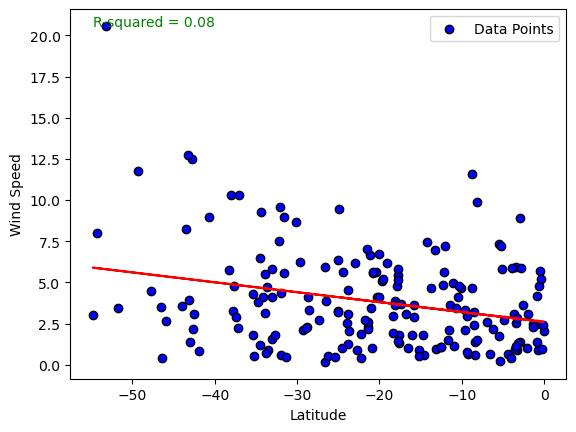

In [49]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
plot_regression (southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-20, 8))

#### Discussion about the Wind speed and Latitude relationship: 
- With an r-value of 0.0435971651557356, the northern hemisphere shows no relationship between Wind speed and latitude. However, the southern hemisphere shows an r-value of -0.27976084951763114 this depicts a strong correlation coefficient of the relationship between wind speed and latitude. 